In [1]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import numpy as np

In [2]:
#our aim is to pick only 1 feature and determine whether the label is verginica(2) or not
iris=datasets.load_iris()
#picking only the last col of our feature or the data
X=iris.data[:,3:]
#by picking only the iris.target==2 we get the true and false values where it is verginica and by putting the astype of np we converted those true and false into the numbers
y=(iris.target==2).astype(np.int)


In [3]:
clf=LogisticRegression()
clf.fit(X,y)
clf.predict(([[2.6]]))

array([1])

In [4]:
#this funct returns the probability
clf.predict_proba([[2.6]])

array([[0.01676901, 0.98323099]])

## Titanic Data Analysis using Logistic Regression

In [5]:
#Collecting the data

In [6]:
import numpy as np
import pandas as pd

In [7]:
titanic=pd.read_csv('titanic.csv')
titanic
#sibsp is the no. of siblings or the spouses
#parch is the number of parents and children
#embared is kai kahn se aye ha passengers where s is southampton, q is queensland etc.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
#Analyzing the Data

In [9]:
titanic.info() # Age has the missing values, cabin has the missing values so as the embarked these had Nan values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanic.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

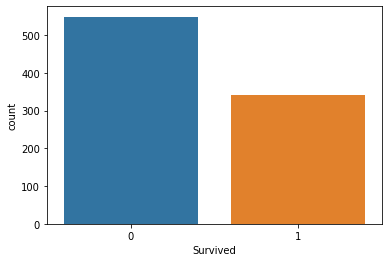

In [12]:
sns.countplot(x=titanic.Survived,data=titanic)#--number of people more died

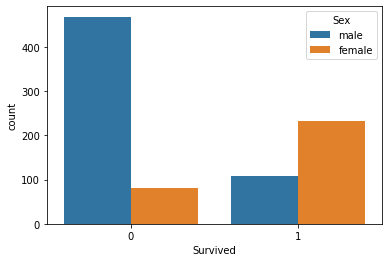

In [13]:
sns.countplot(x=titanic.Survived,hue=titanic.Sex,data=titanic)#--number of male more died wheareas the number of female survived

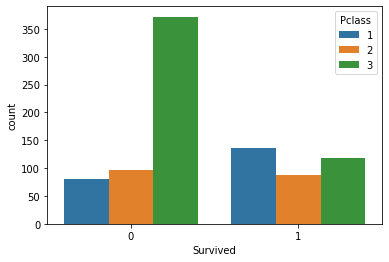

In [14]:
sns.countplot(x=titanic.Survived,hue=titanic.Pclass,data=titanic)#--class 3 which is low class died more where the poeple of class 1 survived more

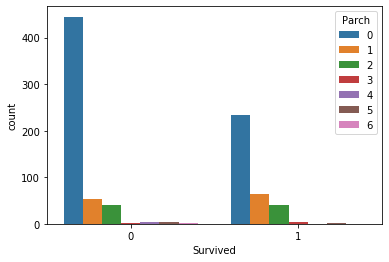

In [15]:
sns.countplot(x=titanic.Survived,hue=titanic.Parch,data=titanic)#--number of people with less siblings and parents were saved and it could be thought that thwe life saving boats had less space

C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <a list of 20 Patch objects>)

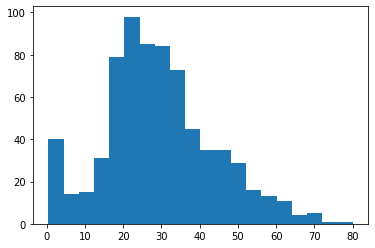

In [16]:
plt.hist(x=titanic.Age, bins=20) #age ranging between 20 and 40 traveled more so more young people

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

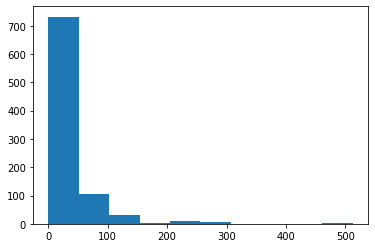

In [17]:
plt.hist(x=titanic.Fare) #- 0-100 was the avg fares

In [18]:
corr_matrix=titanic.corr()

In [19]:
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

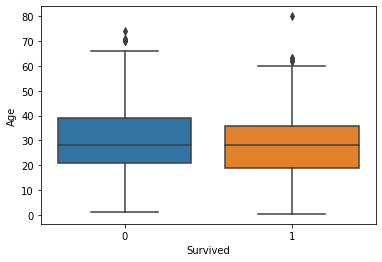

In [20]:
sns.boxplot(x='Survived',y='Age', data=titanic)

In [21]:
#data cleaning

In [22]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
titanic=titanic.dropna(subset=['Embarked'])

In [24]:
titanic=titanic.drop('Cabin',axis=1)

In [25]:
titanic=titanic.drop('Ticket',axis=1)

In [26]:
titanic=titanic.drop('Name',axis=1)
titanic=titanic.drop('PassengerId',axis=1)

In [27]:
#selecting the drop_first to the True means now the male and female are submerged into a one col if i had put it to false means no i would had 2 col of male and female
sex=pd.get_dummies(titanic.Sex,drop_first=True)

In [28]:
titanic=titanic.drop('Sex',axis=1)

In [29]:
titanic['Sex']=sex

In [30]:
emb=pd.get_dummies(titanic.Embarked,drop_first=False)

In [31]:
titanic=titanic.drop('Embarked',axis=1)

In [32]:
#we use the concat method because in emb we have got the 3 col
titanic=pd.concat([titanic,emb],axis=1)

In [33]:
p=pd.get_dummies(titanic.Pclass,drop_first=True)

In [34]:
titanic=titanic.drop('Pclass',axis=1)

In [35]:
titanic=pd.concat([titanic,p],axis=1)

In [36]:
titanic

,Survived,Age,SibSp,Parch,Fare,Sex,C,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,0,1,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,0,0,1,1,0
887,1,19.0,0,0,30.0000,0,0,0,1,0,0
888,0,NaN,1,2,23.4500,0,0,0,1,0,1
889,1,26.0,0,0,30.0000,1,1,0,0,0,0


In [37]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
x=imputer.fit_transform(titanic)

In [38]:
titanic_tr=pd.DataFrame(x,columns=titanic.columns)

In [39]:
titanic_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
Survived    889 non-null float64
Age         889 non-null float64
SibSp       889 non-null float64
Parch       889 non-null float64
Fare        889 non-null float64
Sex         889 non-null float64
C           889 non-null float64
Q           889 non-null float64
S           889 non-null float64
2           889 non-null float64
3           889 non-null float64
dtypes: float64(11)
memory usage: 76.5 KB


In [40]:
titanic_tr.head(5)

,Survived,Age,SibSp,Parch,Fare,Sex,C,Q,S,2,3
0,0.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0,0.0,1.0
3,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0,0.0,1.0


In [41]:
#Training and Testing

In [42]:
X=titanic_tr.drop('Survived',axis=1)
Y=titanic_tr.Survived

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=1)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [45]:
my_pipline=Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])

In [46]:
titanic_data=my_pipline.fit_transform(X_train)

In [47]:
clf=LogisticRegression()
clf.fit(titanic_data,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
prepared_data=my_pipline.fit_transform(X_test)

In [49]:
predicted_data=clf.predict(prepared_data)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test,predicted_data)

0.8389513108614233

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predicted_data)

array([[146,  20],
       [ 23,  78]], dtype=int64)

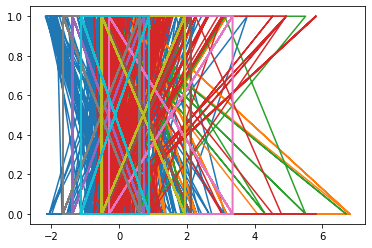

In [64]:
plt.plot(titanic_data,y_train)